# Fine-tuning results extraction

### Import necessary libraries

In [1]:
import json
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from utils import load_data, load_pickle, load_json

### Load validation results, test results and label encoder

In [2]:
val_results = load_json("output_finetune/validation_results.json")
test_results = load_data("output_finetune/test_preds.csv")
le = load_pickle("output_finetune/le.pkl")

### Store actual and predicted labels of test set evaluation to arrays

In [3]:
actual = test_results["true"].to_numpy()
pred = test_results["predicted"].to_numpy()

### Store classes to an array

In [4]:
classes = le.classes_

### Validation set results

In [5]:
print(json.dumps(val_results, indent=4))

{
    "eval_loss": 0.11160976439714432,
    "eval_accuracy": 0.9730941704035875,
    "eval_weighted_f1": 0.9731143145183272,
    "eval_macro_f1": 0.9735231159867113,
    "eval_runtime": 8.4089,
    "eval_samples_per_second": 26.52,
    "eval_steps_per_second": 1.665,
    "epoch": 3.0
}


### Classification report of evaluation on test set

In [6]:
print(classification_report(y_true=actual, y_pred=pred, target_names=classes))

               precision    recall  f1-score   support

     business       0.94      0.99      0.97       102
entertainment       0.97      0.95      0.96        77
     politics       0.98      0.95      0.96        84
        sport       1.00      1.00      1.00       102
         tech       0.97      0.96      0.97        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



### Confusion matrix of evaluation on test set

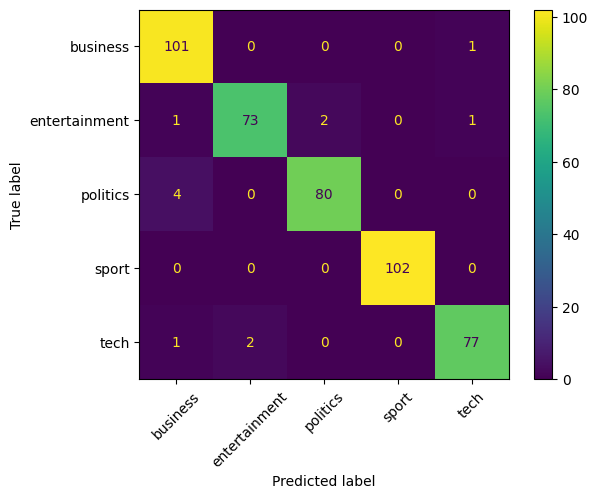

In [7]:
cm = confusion_matrix(actual, pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

ax = disp_cm.plot().ax_

for tick in ax.get_xticklabels():
    tick.set_rotation(45)